In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from scipy.integrate import odeint

### Генерація даних за допомогою системи диференціальних рівнянь

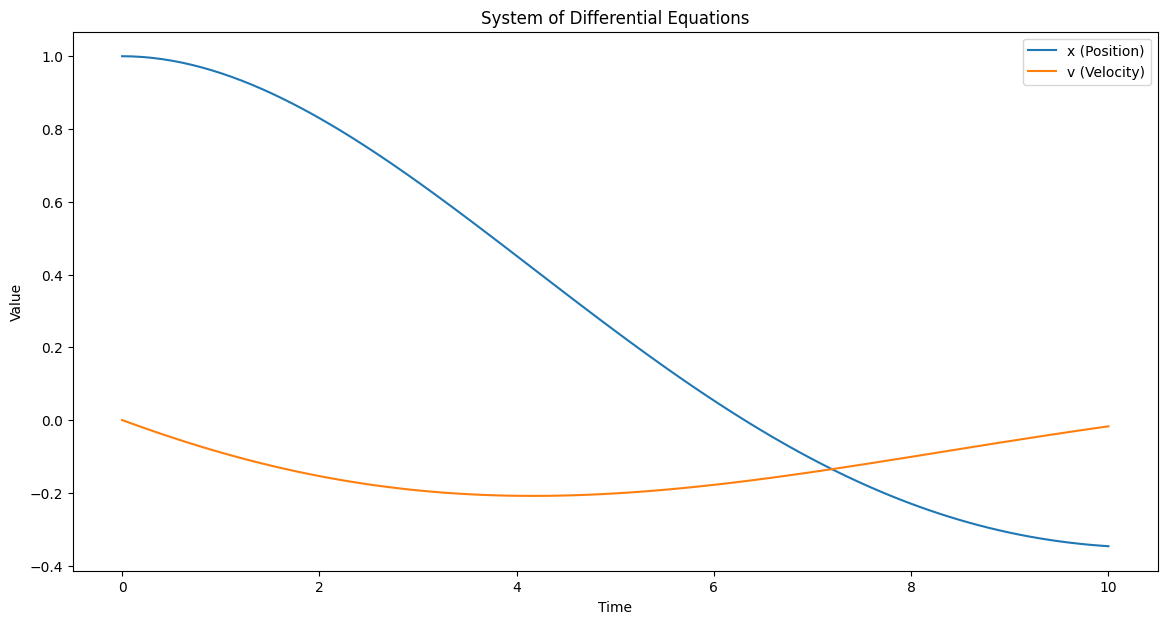

In [59]:
# Функція для системи диференціальних рівнянь
def model(y, t, params):
    x, v = y
    a, b = params
    dxdt = v
    dvdt = -a * x - b * v
    return [dxdt, dvdt]

# Параметри
params = [0.1, 0.2]
y0 = [1.0, 0.0]
t = np.linspace(0, 10, 100)

# Розв'язок диференціальних рівнянь
solution = odeint(model, y0, t, args=(params,))
data = solution

# Перетворення в DataFrame
df = pd.DataFrame(data, columns=['x', 'v'])
df.to_csv('differential_equation_data.csv', index=False)

# Візуалізація
plt.figure(figsize=(14, 7))
plt.plot(t, df['x'], label='x (Position)')
plt.plot(t, df['v'], label='v (Velocity)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('System of Differential Equations')
plt.legend()
plt.show()

In [60]:
# Загрузка даних
df = pd.read_csv('differential_equation_data.csv')
data = df.values


In [61]:
# Нормалізація
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [62]:
# Параметри для TimeseriesGenerator
num_samples = data_scaled.shape[0]
time_steps = 10
batch_size = 32
generator = TimeseriesGenerator(data_scaled, data_scaled, length=time_steps, batch_size=batch_size)


In [63]:
# Створення моделі
model = Sequential([
    LSTM(50, activation='relu', input_shape=(time_steps, data_scaled.shape[1])),
    Dense(data_scaled.shape[1])
])
model.compile(optimizer='adam', loss='mse')

c:\Users\qizixxx\Documents\UNIC\2 course\dubov\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [64]:
# Тренування моделі
history = model.fit(generator, epochs=30, verbose=1)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1876
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1865 
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1226 
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1476 
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1531 
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1380 
Epoch 7/30


c:\Users\qizixxx\Documents\UNIC\2 course\dubov\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1235 
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0597 
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0904 
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0507 
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0750 
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0512 
Epoch 13/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0412 
Epoch 14/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0630 
Epoch 15/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0363 
Epoch 16/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0257 
Epoch 17/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0498 
Epoch 18/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0456 
Epoch 19/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0238 
Epoch 20/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0368 
Epoch 21/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0318 
Epoch 22/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s

In [65]:
# Прогнозування
predictions = model.predict(generator)
predictions = scaler.inverse_transform(predictions)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


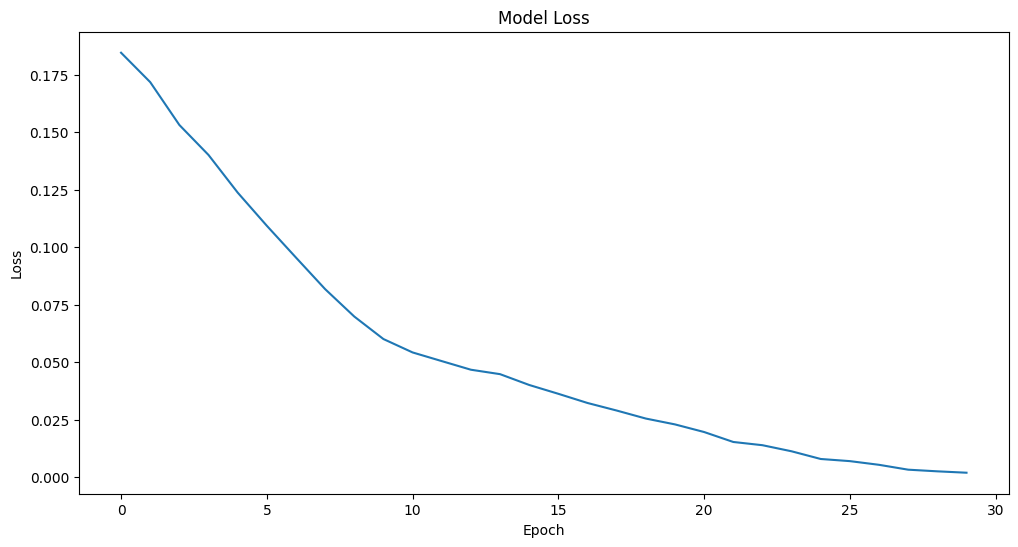

In [66]:
# Візуалізація втрат
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [67]:
# Візуалізація прогнозів
plt.figure(figsize=(14, 7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

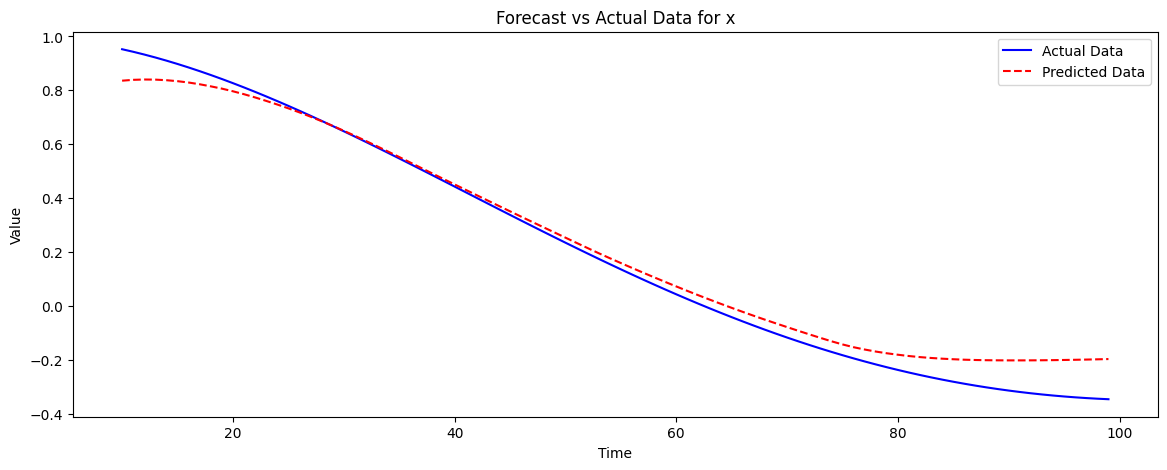

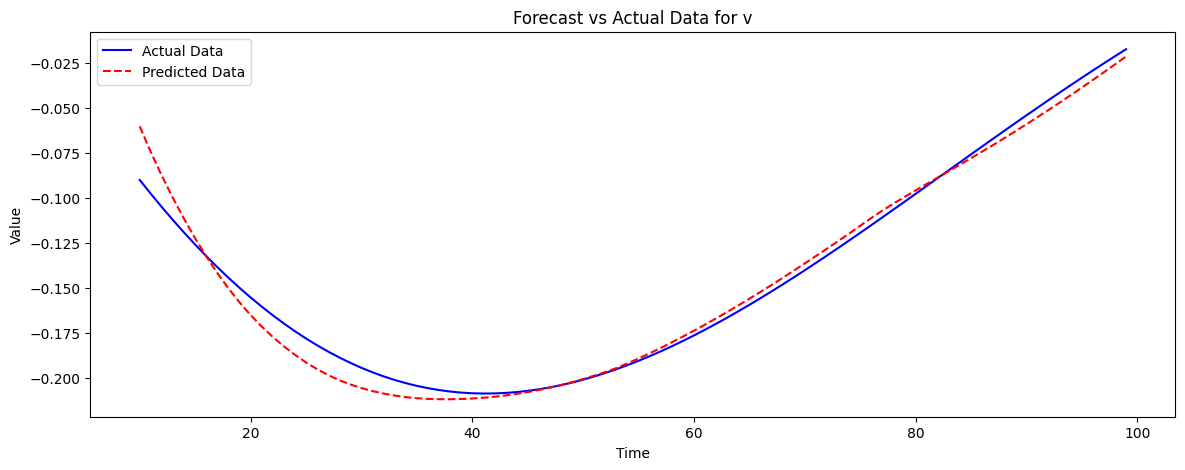

In [68]:
# Візуалізація для кожної змінної
for i, col in enumerate(df.columns):
    plt.figure(figsize=(14, 5))
    plt.plot(df.index[time_steps:], df[col][time_steps:], label='Actual Data', color='blue')
    plt.plot(df.index[time_steps:], predictions[:, i], label='Predicted Data', linestyle='--', color='red')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f'Forecast vs Actual Data for {col}')
    plt.legend()
    plt.show()